# Variable characteristics

The original data source can be found here:
    
Data: https://archive-beta.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition

Variable names: https://www.sciencedirect.com/science/article/pii/S2352340919306985?via%3Dihub#sec1

I've modified the data for the course and uploaded it to the repo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../obesity_nan.csv")
data.head()

,gender,age,height,weight,family_history_with_overweight,eat_high_cal_food,freq_eat_veggies,daily_main_meals,eat_between_meals,smoke,water_intake,moitor_daily_calories,freq_physical_activity,use_of_tech_devices,alcohol_intake,transportation_mean,obesity_type
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,NaN,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,NaN,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,NaN,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,NaN,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


# Which variables contain missing data?

In [3]:
# Tip: there is more than 1 way to obtain this list
# If you did it differently, well done.

vars_nan = [c for c in data.columns if data[c].isnull().any()]
vars_nan

['gender',
 'family_history_with_overweight',
 'daily_main_meals',
 'water_intake',
 'alcohol_intake']

# What's the percentage of missing data in gender and water intake?

In [4]:
data[["gender", "water_intake"]].isnull().mean()

gender          0.087636
water_intake    0.145902
dtype: float64

# What is the cardinality of eat_between_meals?

In [5]:
data["eat_between_meals"].nunique()

4

In [6]:
data["eat_between_meals"].unique()

array(['Sometimes', 'Frequently', 'Always', 'no'], dtype=object)

# Are there highly cardinal categorical variables?

In [7]:
cat_vars = [c for c in data.columns if data[c].dtypes=="O"]

data[cat_vars].nunique()

gender                            2
family_history_with_overweight    2
eat_high_cal_food                 2
eat_between_meals                 4
smoke                             2
moitor_daily_calories             2
alcohol_intake                    3
transportation_mean               5
obesity_type                      7
dtype: int64

Not really.

## Are there variables with rare labels? Consider rare if present in less than 5% of the data.

In [8]:
for var in cat_vars:
    print(data[var].value_counts(normalize=True), "\n")

gender
Male      0.507788
Female    0.492212
Name: proportion, dtype: float64 

family_history_with_overweight
yes    0.815455
no     0.184545
Name: proportion, dtype: float64 

eat_high_cal_food
yes    0.883941
no     0.116059
Name: proportion, dtype: float64 

eat_between_meals
Sometimes     0.836097
Frequently    0.114638
Always        0.025107
no            0.024159
Name: proportion, dtype: float64 

smoke
no     0.979157
yes    0.020843
Name: proportion, dtype: float64 

moitor_daily_calories
no     0.954524
yes    0.045476
Name: proportion, dtype: float64 

alcohol_intake
Sometimes     0.666440
no            0.301566
Frequently    0.031995
Name: proportion, dtype: float64 

transportation_mean
Public_Transportation    0.748460
Automobile               0.216485
Walking                  0.026528
Motorbike                0.005211
Bike                     0.003316
Name: proportion, dtype: float64 

obesity_type
Obesity_Type_I         0.166272
Obesity_Type_III       0.153482
Obesity_T

The variables "eat_between_meals", "smoke", "moitor_daily_calories", "alcohol_intake" and "transportation_mean" contain at least 1 rare label.

# Are all numerical variables skewed?

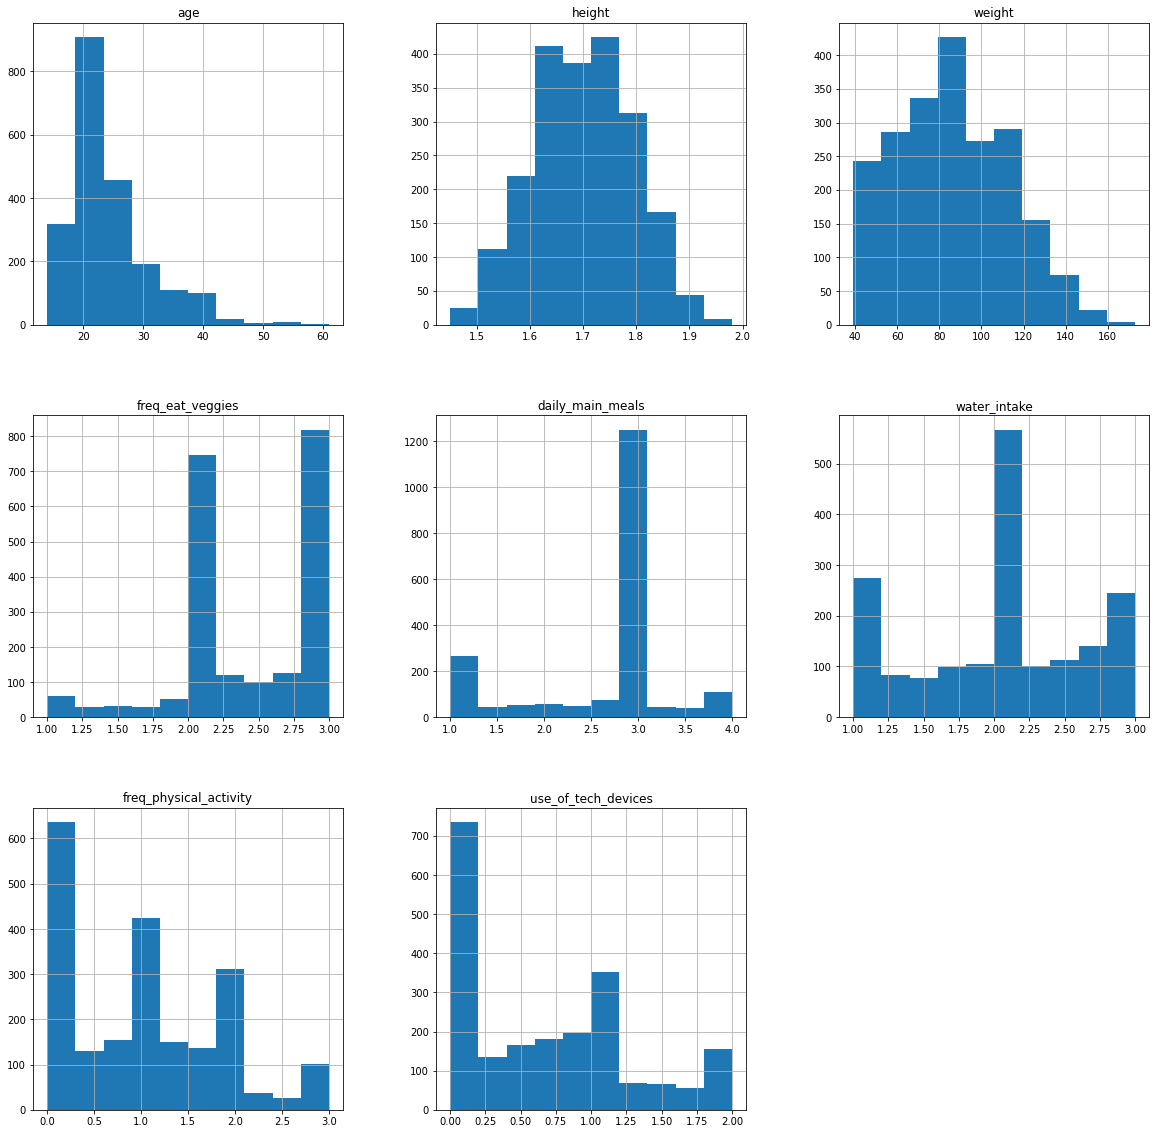

In [9]:
data.hist(figsize=(20,20))
plt.show()

Nope. The variable "height" seems normally distributed. The variable "age" is clearly skewed. Apart from "weight", all the remaining variables show a fairly uniform distribution apart from a few very frequent occurrences.

# Are there outliers in height? Use the normal distribution.

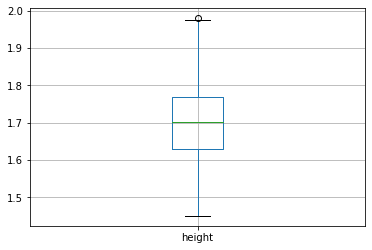

In [10]:
data.boxplot(column="height")
plt.show()

In [11]:
# boundaries

low = data["height"].mean() - 3 * data["height"].std()
up = data["height"].mean() + 3 * data["height"].std()

# outliers at the left of the distribution
(data["height"] < low).sum()

0

In [12]:
# outliers at the right of the distribution

(data["height"] > up).sum()

0

# Are there outliers in age?

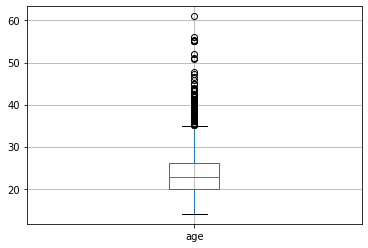

In [13]:
data.boxplot(column="age")
plt.show()

In [14]:
def find_skewed_boundaries(df, variable, distance):

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

op, low = find_skewed_boundaries(data, 'age', 1.5)

# outliers at the left of the distribution
(data["age"] < low).sum()

0

In [15]:
# outliers at the right of the distribution

(data["age"] > up).sum()

2111

Subscribe is binary, and day is discrete. I'd argue that we can consider the rest of the variables continuous.

# Are the numerical variables in a similar scale?

In [16]:
num_vars = [c for c in data.columns if c not in cat_vars]

data[num_vars].describe()

,age,height,weight,freq_eat_veggies,daily_main_meals,water_intake,freq_physical_activity,use_of_tech_devices
count,2111.000000,2111.000000,2111.000000,2111.000000,1988.000000,1803.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.683858,2.017908,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778213,0.605278,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658289,1.629763,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.480416,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


Nope.